Code for plotting planes in python.
Quiver adds axes for readability

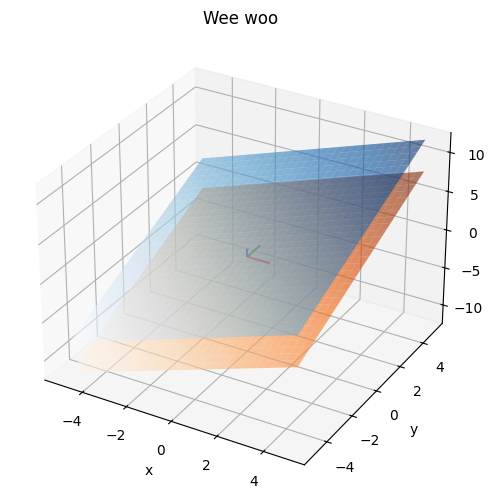

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid values for x and y
x = np.linspace(-5, 5, 30)   # range for x
y = np.linspace(-5, 5, 30)   # range for y
X, Y = np.meshgrid(x, y)     # create grid of (x,y) points

# Define the plane: z = x + y + 2
Z1 = X + Y + 2   # plane 1. The z-intercept here when setting x and y to 0 is +2.
Z2 = X + Y - 2   # plane 2.  The z-intercept here when setting x and y to 0 is -2.

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot both planes
ax.plot_surface(X, Y, Z1, alpha=0.6, cmap="Blues", edgecolor="none")
ax.plot_surface(X, Y, Z2, alpha=0.6, cmap="Oranges", edgecolor="none")

# Label axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Wee woo")

ax.quiver(0, 0, 0, 1, 0, 0, color="red", arrow_length_ratio=0.1)  # x-axis #code in form of vector starting at 0,0,0 with red arrow in direction of x axis
ax.quiver(0, 0, 0, 0, 1, 0, color="green", arrow_length_ratio=0.1)  # y-axis
ax.quiver(0, 0, 0, 0, 0, 1, color="blue", arrow_length_ratio=0.1)  # z-axis

plt.show()



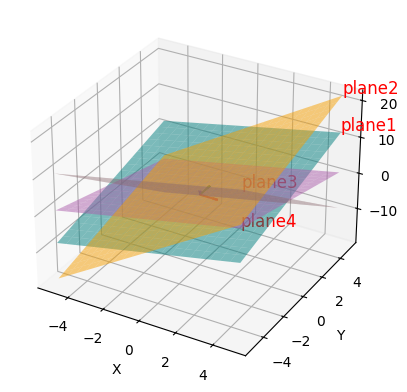

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# General plane plotting function
def plot_plane(ax, plane_func, x_range, y_range, color='cyan', alpha=0.5, label=True):
    """
    ax         : 3D axis object
    plane_func : function of (x, y) returning z
    x_range    : tuple (xmin, xmax)
    y_range    : tuple (ymin, ymax)
    color      : color of the plane
    alpha      : transparency
    label      : whether to label the plane with its equation
    """
    # Create grid
    x = np.linspace(x_range[0], x_range[1], 20)
    y = np.linspace(y_range[0], y_range[1], 20)
    X, Y = np.meshgrid(x, y)
    Z = plane_func(X, Y)
    
    # Plot the surface
    ax.plot_surface(X, Y, Z, color=color, alpha=alpha)
    
    # Automatically place the equation label at the top-right corner
    if label:
        max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
        x_label = X[max_idx]
        y_label = Y[max_idx]
        z_label = Z[max_idx]
        # Try to get equation string from function name if possible
        try:
            eq_str = plane_func.__name__.replace('_', ' ')
        except:
            eq_str = 'Plane'
        ax.text(x_label, y_label, z_label + 0.5, eq_str, color='red', fontsize=12)

# Example plane functions
def plane1(X, Y):
    return X + Y + 2

def plane2(X,Y):
    return 3*X + Y + 2

def plane3(X, Y):
    return X - 3*Y + 1

def plane4(X, Y):
    return X - Y + 1




# Plotting all planes together
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Call function for each plane
plot_plane(ax, plane1, (-5, 5), (-5, 5), color='teal', alpha=0.5)
plot_plane(ax, plane2, (-5, 5), (-5, 5), color='orange', alpha=0.5)
plot_plane(ax, plane3, (-5, 5), (-5, 5), color='pink', alpha=0.5)
plot_plane(ax, plane4, (-5, 5), (-5, 5), color='violet', alpha=0.5)

# Axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.quiver(0, 0, 0, 1, 0, 0, color="red", arrow_length_ratio=0.3)  # x-axis #code in form of vector starting at 0,0,0 with red arrow in direction of x axis
ax.quiver(0, 0, 0, 0, 1, 0, color="green", arrow_length_ratio=0.3)  # y-axis
ax.quiver(0, 0, 0, 0, 0, 1, color="blue", arrow_length_ratio=0.3)  # z-axis

plt.show()
